In [1]:
import pandas as pd
import logging
import json

prefix = 'data/'

In [3]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_df = pd.read_csv(prefix + 'twitter_train.txt', sep='\t', header=None) 
train_df = train_df[train_df.columns[1:3]]
train_df.columns = ['labels', 'text']
train_df = train_df[['text', 'labels']]

val_df = pd.read_csv(prefix + 'twitter_test.txt', sep='\t', header=None)
val_df = val_df[val_df.columns[1:3]]
val_df.columns = ['labels', 'text']
val_df = val_df[['text', 'labels']]

train_df

,text,labels
0,It feels like just a few days ago it was the l...,1
1,"I love my mom . No matter what we go through ,...",1
2,Bump that music ... #imtryingtosleep #sarcasm,1
3,Mexican and black jokes are pretty much the sa...,0
4,How to find work you love :,0
...,...,...
51184,RT My EX had one very annoying habit . Breathi...,1
51185,"Some days you're the Titanic , some days you'r...",1
51186,"Congrats on the release of 25 @Adele , let's h...",0
51187,doing my favorite thing .. crying #sarcasm,1


In [5]:
train_df = pd.read_csv(prefix + 'train_MUSTARD', sep='\t', header=None) 
val_df = pd.read_csv(prefix + 'val_MUSTARD', sep='\t', header=None)
pd.options.display.max_colwidth = 1000
data = json.load(open('data/sarcasm_max512.json'))
sarcasm_data = [[' '.join([ *d['context'], d['utterance']]), int(d['sarcasm'])] for d in data.values()]
df = pd.DataFrame(sarcasm_data)
df.columns = ['text', 'labels']
train_df = df.sample(frac = 0.8)
val_df = df.drop(train_df.index)
train_df

,labels,text
87,"That's a great idea. I'm going to get him to sign a Batman as well. What is it about the word ""unique"" you don't understand? Damn, paper cut. Nothing worse than a paper cut. Well, obviously you don't remember your circumcision. There's Neosporin and Band-Aids in my top desk drawer. Why don't you keep that stuff in the bathroom?",0
486,"Honey, you remember my boss Doug right? Yes, hi. Hi. So good news, the divorce is final. I signed the papers this A.M. I didn't know you and Carol were getting divorced, I'm sorry.",0
680,Chandler? Hey! Ah! What do you think? I think I can see your scalp! What do you know? Its a treat for the eyes and the ears.,1
642,"Was there ever any doubt? Momentarily. This is strictly off the record, but Dirk's nearly five years younger that I. In what Blanche, dog years?",1
260,"If I were going to Hawaii, I'd spend all my time at the Keck Observatory.\nDid you know that the telescopes there have better resolution than the Hubble? Really?\nWant to go to Hawaii? Ladies?\nLadies...\nLadies? Come in. Ladies. What's up? As you may know, I've been experimenting with elevated anxiety levels, and I thought, what better way to increase my discomfort than to subject myself to an evening of tasteless uncensored crotch talk?",0
...,...,...
10,"And I cannot believe people pay for horoscopes, but on a more serious note, it's 8:13 and we're still not playing Halo. Fine. We'll just play one-on-one until he gets back. One-on-one? We don't play one-on-one. We play teams, not one-on-one. One-on-one. The only way we can play teams at this point is if we cut Raj in half. Sure, cut the foreigner in half. There's a billion more where he came from.",1
346,Are you kidding me? Joey Joey Joey Joey! Did I wake you?,1
258,"This isn't so bad. That's easy for you to say. \nYour chair's not facing the lingerie section. Boy, that's a lot of panties. You guys comfy? This might take a while. You know, I don't understand why women insist on making a big production out of buying clothes. No, you're right, we should do what you do. Have our mom send us pants from the Walmart in Houston.",1
465,"OK, I have a question. Well, actually, it's not so much a question as.. more of a general wondering... ment. OK. OK. Here goes. For a while now, I've been wanting to, um.... Ohhh!!!!",0


In [13]:
mask = (df['text'].str.len() <= 512)
df[mask]

,text,labels
0,"Yeah, I get that argument. At this point, I'd ...",0
1,The blazers and Mavericks (The wests 5 and 6 s...,0
2,They're favored to win. They were underdogs ea...,0
3,deadass don't kill my buzz This meme isn't fun...,0
4,Yep can confirm I saw the tool they use for th...,0
...,...,...
1010821,"No one is calling this an engineered pathogen,...",1
1010822,In a move typical of their recent do-nothing a...,1
1010823,Screw the Disabled--I've got to get to Church ...,1
1010824,I've always been unsettled by that. I hear a l...,1


In [75]:
#df_train = json.load(open('data/reddit_train.json'))
df = pd.read_csv('data/train-balanced-sarcasm.csv', encoding='utf8', on_bad_lines='skip')
df.head(5)


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [76]:
df_partial = df[['label','comment','parent_comment']]
df_partial['parent_comment'] += ' ' 
df_partial['parent_comment'] += df_partial['comment']
df_partial = df_partial[['label', 'parent_comment']]
df_partial.columns = ['labels', 'text']
df_partial = df_partial[['text', 'labels']]
df_partial.head(5)

/tmp/ipykernel_8369/2753996168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_partial['parent_comment'] += ' '
/tmp/ipykernel_8369/2753996168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_partial['parent_comment'] += df_partial['comment']


,text,labels
0,"Yeah, I get that argument. At this point, I'd ...",0
1,The blazers and Mavericks (The wests 5 and 6 s...,0
2,They're favored to win. They were underdogs ea...,0
3,deadass don't kill my buzz This meme isn't fun...,0
4,Yep can confirm I saw the tool they use for th...,0


In [77]:
df_partial = df_partial[mask]
df_partial = df_partial.head(500000)
train_df = df_partial.sample(frac = 0.8)
val_df = df_partial.drop(train_df.index)
train_df.to_csv("data/reddit_train.csv", index = False)
val_df.to_csv("data/reddit_val.csv", index = False)

<AxesSubplot: ylabel='Frequency'>

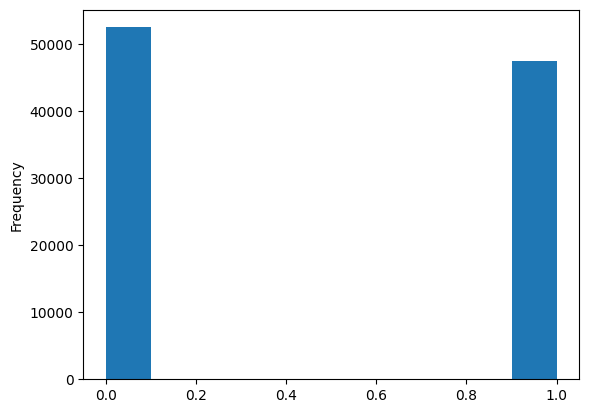

In [81]:
val_df['labels'].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

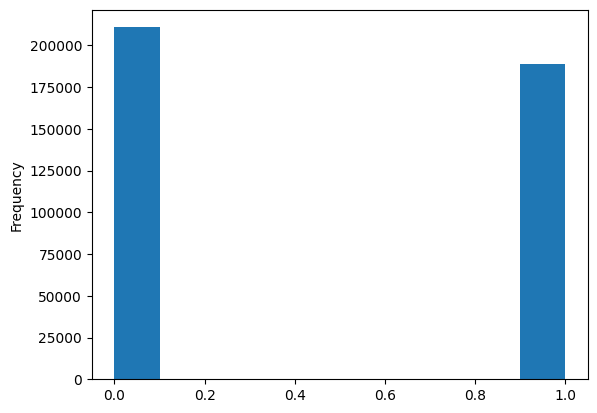

In [82]:
train_df['labels'].plot(kind='hist')